# Logistic Regression Lab

### Loading the Data

In [1]:
import pandas as pd

In [86]:
df = pd.read_csv('./Telco-Customer-Churn.csv')

In [87]:
df[:2]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [88]:
df_obj = df.select_dtypes('object')

In [89]:
df_obj.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [90]:
selected_obj_cols = df_obj.iloc[:, 1:].drop('TotalCharges', axis = 1)

In [91]:
selected_obj_cols[:2]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [96]:
selected_obj_cols.isna().any()

gender              False
Partner             False
Dependents          False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
Churn               False
dtype: bool

In [97]:
selected_cols = selected_obj_cols.columns

In [487]:
from sklearn.preprocessing import OneHotEncoder
steps = [([col], OneHotEncoder(drop = 'first'))for col in selected_obj_cols.columns]

In [488]:
steps[:2]

[(['gender'],
  OneHotEncoder(categorical_features=None, categories=None, drop='first',
                dtype=<class 'numpy.float64'>, handle_unknown='error',
                n_values=None, sparse=True)),
 (['Partner'],
  OneHotEncoder(categorical_features=None, categories=None, drop='first',
                dtype=<class 'numpy.float64'>, handle_unknown='error',
                n_values=None, sparse=True))]

In [489]:
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper(steps, df_out = True)

In [490]:
trans_obj_cols = mapper.fit_transform(selected_obj_cols)

In [491]:
trans_obj_cols[:2]

,gender,Partner,Dependents,PhoneService,MultipleLines_x0_No phone service,MultipleLines_x0_Yes,InternetService_x0_Fiber optic,InternetService_x0_No,OnlineSecurity_x0_No internet service,OnlineSecurity_x0_Yes,...,StreamingTV_x0_Yes,StreamingMovies_x0_No internet service,StreamingMovies_x0_Yes,Contract_x0_One year,Contract_x0_Two year,PaperlessBilling,PaymentMethod_x0_Credit card (automatic),PaymentMethod_x0_Electronic check,PaymentMethod_x0_Mailed check,Churn
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [492]:
updated_df = df.select_dtypes(exclude = 'object')

In [493]:
updated_df[trans_obj_cols.columns] = trans_obj_cols

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [496]:
# updated_df

In [497]:
updated_df[:2].dtypes

SeniorCitizen                                 int64
tenure                                        int64
MonthlyCharges                              float64
gender                                      float64
Partner                                     float64
Dependents                                  float64
PhoneService                                float64
MultipleLines_x0_No phone service           float64
MultipleLines_x0_Yes                        float64
InternetService_x0_Fiber optic              float64
InternetService_x0_No                       float64
OnlineSecurity_x0_No internet service       float64
OnlineSecurity_x0_Yes                       float64
OnlineBackup_x0_No internet service         float64
OnlineBackup_x0_Yes                         float64
DeviceProtection_x0_No internet service     float64
DeviceProtection_x0_Yes                     float64
TechSupport_x0_No internet service          float64
TechSupport_x0_Yes                          float64
StreamingTV_

First let's make the TotalCharges column numeric.

In [498]:
num_charges = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan))

In [499]:
updated_num_charges = updated_df.assign(TotalCharges = num_charges)

Then use a DataFrameMapper to impute the `nan` values with the mean, and add a column called `TotalCharges_is_na`.

In [500]:
mapper = DataFrameMapper([
    (['TotalCharges'], SimpleImputer()),
    (['TotalCharges'], MissingIndicator(), {'alias': 'TotalCharges_is_na'})
     ], df_out = True)

In [501]:
charges_df = mapper.fit_transform(updated_num_charges)

In [502]:
charges_df[charges_df['TotalCharges_is_na'] == True]

# 	TotalCharges	TotalCharges_is_na
# 488	2283.300441	True
# 753	2283.300441	True
# 936	2283.300441	True
# 1082	2283.300441	True
# 1340	2283.300441	True
# 3331	2283.300441	True
# 3826	2283.300441	True
# 4380	2283.300441	True
# 5218	2283.300441	True
# 6670	2283.300441	True
# 6754	2283.300441	True

,TotalCharges,TotalCharges_is_na
488,2283.300441,True
753,2283.300441,True
936,2283.300441,True
1082,2283.300441,True
1340,2283.300441,True
3331,2283.300441,True
3826,2283.300441,True
4380,2283.300441,True
5218,2283.300441,True
6670,2283.300441,True


Now update the `updated_num_charges` dataframe with these columns.

In [503]:
coerced_df = updated_num_charges.copy()


In [517]:
# coerced_df[:2]

In [504]:
coerced_df[charges_df.columns] = charges_df

Ok, now our data is almost ready.  We just need to drop the customerid column.

### Training a Model

In [518]:
X = coerced_df.drop('Churn', axis = 1)

In [519]:
y = coerced_df['Churn']

There is one last feature transformation that we need to apply.  Because logistic regression trains through gradient descent, we need to first scale our features.  We can do so by applying the standard scaler to our feature data.

In [520]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed_X = scaler.fit_transform(X)

In [521]:
transformed_X_df = pd.DataFrame(transformed_X, columns = X.columns)

In [522]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X_df, y, test_size = .4)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test)

In [531]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [532]:
model.score(X_validate, y_validate)

0.7860861334595362

In [533]:
y_validate.value_counts(normalize = True)

0.0    0.732134
1.0    0.267866
Name: Churn, dtype: float64

### Checking Features

In [534]:
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model).fit(X_validate, y_validate)

exp_df = eli5.explain_weights_df(perm, feature_names = list(X.columns))

In [535]:
exp_df[:12]

,feature,weight,std
0,tenure,0.103549,0.006027
1,InternetService_x0_Fiber optic,0.040133,0.003743
2,TotalCharges,0.023190,0.002808
3,MonthlyCharges,0.018268,0.002272
4,Contract_x0_Two year,0.012021,0.002670
5,Contract_x0_One year,0.007572,0.004169
6,PaperlessBilling,0.005963,0.003287
7,StreamingMovies_x0_Yes,0.003407,0.002564
8,MultipleLines_x0_Yes,0.003313,0.001821
9,MultipleLines_x0_No phone service,0.003218,0.001011


In [536]:
selected_cols = exp_df.feature[:10].values

In [540]:
model = LogisticRegression()
model.fit(X_train[selected_cols], y_train)

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [541]:
model.score(X_validate[selected_cols[:10]], y_validate)

0.7789872219592996

In [542]:
X_validate[selected_cols][:3]

,tenure,InternetService_x0_Fiber optic,TotalCharges,MonthlyCharges,Contract_x0_Two year,Contract_x0_One year,PaperlessBilling,StreamingMovies_x0_Yes,MultipleLines_x0_Yes,MultipleLines_x0_No phone service
3298,-1.155283,-0.88566,-0.971371,-1.486035,-0.562975,-0.514249,-1.205113,-0.796070,-0.854176,-0.327438
1785,1.450820,-0.88566,1.814499,0.911938,1.776278,-0.514249,0.829798,1.256171,1.170719,-0.327438
1890,-1.277445,-0.88566,-0.998879,-1.454461,-0.562975,-0.514249,0.829798,-0.796070,-0.854176,-0.327438


It appears that the most relevant feature is tenure.  Let's take a look at the coefficients of our model.

In [543]:
model.coef_[0][0:4]

array([-1.29814107,  0.56305416,  0.38567755,  0.18352349])

It appears that the longer the tenure the more likely someone is to drop out.

### Plotting our Relevant Features

Let's plot our data along with the `tenure` and `MonthlyCharges` features.  Two of our most important features.  First separate the observations of our training data by the target -- churn or not.

In [544]:
churned_customers = coerced_df_no_id[coerced_df_no_id['Churn'] == 1]
retained_customers = coerced_df_no_id[coerced_df_no_id['Churn'] == 0]

Then let's plot a scatter plot of the two customers.

In [545]:
retained_sample = retained_customers.sample(1869)

In [546]:
import plotly.graph_objects as go
churned_scatter = go.Scatter(x = churned_customers['tenure'], y = churned_customers['MonthlyCharges'], mode = 'markers', name = 'churned')
retained_scatter = go.Scatter(x = retained_sample['tenure'], y = retained_sample['MonthlyCharges'], mode = 'markers', name = 'retained')
fig = go.Figure([retained_scatter, churned_scatter], {'title': 'churned customers', 'xaxis': {'title': 'tenure'}, 'yaxis': {'title': 'monthly charges'}})

Finally, we can add in the decision trace. 

We can do so by taking the corresponding coefficients from our model, and plugging them into the decision boundary y function.

In [547]:
model.coef_[0][:3]

array([-1.29814107,  0.56305416,  0.38567755])

> The first and third coeficients are for tenure and monthly charges.

In [548]:
boundaries = [decision_boundary_y(idx, [[-0.05097494, 0.02525857]], model.intercept_) 
              for idx in area_values]

In [339]:
area_values = list(range(0, 40))

def decision_boundary_y(x, coefs, intercept):
    coef_pair = coefs[0]
    return -(coef_pair[0]/coef_pair[1])*x + -intercept[0]/coef_pair[1]

> See this stackoverflowpost on [plotting a decision boundary](https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary) for explanation of `decision_boundary_y` function.

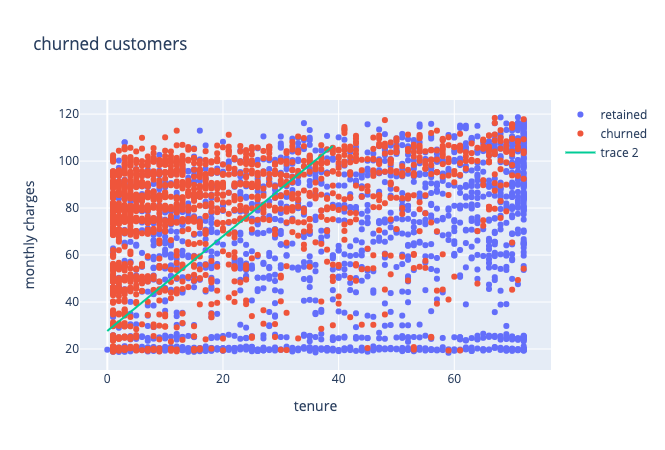

In [360]:
scatter = go.Scatter(x = area_values, y = boundaries)
fig.add_trace(scatter)

So we can see that the model predicts those above the line will churn.

### Reviewing Hypothesis Function Components

Let's remember that our model offers three different kinds of predictions for each observations.  The first is the label of a 1 or 0 for each observation.

Use the `predict` function to show the labels predict for the first 10 observations in the validation set. 

In [388]:
model.predict(X_validate[selected_cols[:10]])[:10]

# array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

The second kind of prediction is the score returned from the decision function.  Recall that our linear regression function will use the parameters from the model to calculate each observations score.  If the score is positive it predicts a 1 and if negative the model predicts a 0.

So now let's look at the score returned from the decision function, of the validation set's first 10 observations.

In [390]:
ten_scores = model.decision_function(X_validate[selected_cols[:10]])[:10]
ten_scores

# array([ 0.27039137, -4.30055017, -5.09076087, -2.42923092,  0.54043335,
#        -1.49341119, -2.7741107 , -5.21090536, -1.45046688, -3.82855107])

array([ 0.27039137, -4.30055017, -5.09076087, -2.42923092,  0.54043335,
       -1.49341119, -2.7741107 , -5.21090536, -1.45046688, -3.82855107])

Just as we suspected.  The positive scores translated to 1s when we used our `predict` method.

Finally, these scores from the decision function translate to probabilities by use of the sigmoid function.  First define the sigmoid function below.

In [391]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Then we can check that the correct scores are returned.  For example, because the first score of `0.27039137` is close to zero, we should see a number close to .5, and we do.

In [392]:
sigmoid(ten_scores)
# array([0.56718898, 0.01337965, 0.0061157 , 0.08097068, 0.63191322,
#        0.18341028, 0.05873932, 0.00542712, 0.18992972, 0.02127848])

array([0.56718898, 0.01337965, 0.0061157 , 0.08097068, 0.63191322,
       0.18341028, 0.05873932, 0.00542712, 0.18992972, 0.02127848])

We can also check that the scores from our sigmoid function match those returned from the `predict_proba` function in the model.

In [394]:
prob_predictions = model.predict_proba(val_churn_X[selected_cols[:10]])
prob_predictions

array([[0.43281102, 0.56718898],
       [0.9938843 , 0.0061157 ],
       [0.36808678, 0.63191322],
       ...,
       [0.57440011, 0.42559989],
       [0.69474394, 0.30525606],
       [0.37627568, 0.62372432]])

If we look at just the second column of predictions, we can see that they do.

In [395]:
prob_predictions[:10, 1]

array([0.56718898, 0.0061157 , 0.63191322, 0.18341028, 0.05873932,
       0.35529193, 0.45538755, 0.46277103, 0.68137516, 0.67708337])

### Summary

In this lesson we saw to perform feature engineering and train a logistic regression model.  We 

### Resources

[Random Forest Logistic Regression](https://www.kaggle.com/farazrahman/telco-customer-churn-logisticregression/data)

[Seguro Safe Driver](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/notebooks)

In [441]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [442]:
rfc.score(X_validate, y_validate)

0.7893989588263133

In [447]:
model = LogisticRegression(solver = 'sag', n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_validate, y_validate)

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



0.7619498343587316

### Choosing Solvers

[Choosing Solvers](https://medium.com/@venali/conventional-guide-to-supervised-learning-with-scikit-learn-logistic-regression-generalized-e9783c414588)